<a href="https://colab.research.google.com/github/minjeon99/ESAA-10th-OB/blob/Week5/w5_mon_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **08 텍스트 분석**

## **6. 토픽 모델링(Topic Modeling) - 20 뉴스그룹**

- 토픽 모델링(Topic Modeling): 문서 집합에 숨어 있는 주제 찾기
  - 사람이 수행하는 토픽 모델링은 함축적인 의미로 문장을 요약
  - 머신러닝 기반 토픽 모델은 숨겨진 주제를 효과적으로 표현할 수 있는 중심 단어를 함축적으로 추출
- 머신러닝 기반 토픽 모델링 기법
  - LSA(Latent Semantic Analysis)
  - LDA(Latent Dirichlet Allocation)
    - 차원 축소의 LDA(Linear Discriminant Analysis)와 다른 알고리즘

- 20 뉴스그룹 데이터의 20가지 주제

  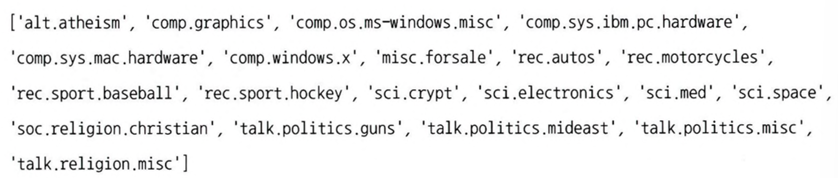

- 야구, 그래픽스, 윈도우, 중동, 기독교, 전자공학, 의학 8개 주제를 추출 -> LDA 기반 토픽 모델링 적용하기
- 사이킷런의 `LatentDirichletAllocation` 클래스
1. `categories` 파라미터를 통해 필요한 주제만 필터링해 추출
2. Count 기반 벡터화 - LDA는 Count 기반 벡터화만 사용
  - LDA는 단어들의 빈도수를 기반으로 하기 때문에 TF-idf가 아닌 Count를 이용
  - `max_features=1000`으로 word 피처 개수 제한
  - `ngram_range=(1,2)`

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 8개 주제 추출
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x',
        'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med']

# cats 변수로 기재된 카테고리만 추출
news_df = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'),
                             categories=cats, random_state=0)

# LDA는 Count 기반 벡터화만 적용
count_vect = CountVectorizer(max_df=0.95, max_features=1000, min_df=2, stop_words='english', ngram_range=(1,2))
feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (7862, 1000)


- 문서: 7862개
- 피처: 1000개

3. 토픽 개수는 위에서 추출한 주제와 동일한 8개로 정하기
  - n_components 파라미터로 조정

In [2]:
lda = LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

4. `components_`의 형태와 속성값 확인
  - `fit()` 수행하면 `LatentDirichletAllocation` 객체가 `components_` 속성값을 가짐
  - `components_`: 개별 토픽에 각 word 피처가 얼마나 많이 할당됐는지에 대한 수치
    - 높은 값일수록 해당 word 피처가 그 토픽의 중심 피처가 됨

In [3]:
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

- 8개 토픽별로 1000개의 word 피처가 해당 토픽에 대한 연관도 값을 가짐
- `components_`값만으로는 토픽별 word 연관도를 보기 어려움
  - 연관도가 높은 순으로 Word를 나열하는 함수 정의

In [4]:
def display_topics(model, feature_names, no_top_words):
  for topic_index, topic in enumerate(model.components_):
    print('Topic #', topic_index)

    # components_ array를 값이 큰 순으로 정렬하고 인덱스 반환
    topic_word_indexes = topic.argsort()[::-1]
    top_indexes = topic_word_indexes[:no_top_words]

    # top_indexes 대상인 인덱스별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
    feature_concat = ' '.join([feature_names[i] for i in top_indexes])
    print(feature_concat)

# CountVectorizer 객체 내의 전체 word 명칭을 get_feature_names_out()을 통해 추출
feature_names = count_vect.get_feature_names_out()

# 토픽별 가장 연관도가 높은 word 15개 추출
display_topics(lda, feature_names, 15)

Topic # 0
year 10 game medical health team 12 20 disease cancer 1993 games years patients good
Topic # 1
don just like know people said think time ve didn right going say ll way
Topic # 2
image file jpeg program gif images output format files color entry 00 use bit 03
Topic # 3
like know don think use does just good time book read information people used post
Topic # 4
armenian israel armenians jews turkish people israeli jewish government war dos dos turkey arab armenia 000
Topic # 5
edu com available graphics ftp data pub motif mail widget software mit information version sun
Topic # 6
god people jesus church believe christ does christian say think christians bible faith sin life
Topic # 7
use dos thanks windows using window does display help like problem server need know run


- 모터사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 전자공학, 의학
0. 불분명한 주제어도 일부 있으나 주로 의학 관련 주제어 추출
1. 명확하지 않고 일반적인 단어가 주를 이룸
2. 컴퓨터 그래픽스 영역의 주제어가 다수 포함
3. 일반적인 단어로 주제어 추출
4. 명확하게 중동 영역 주제어 추출
5. 일부 컴퓨터 그래픽스 영역의 주제어를 포함하고 있지만, 전반적인 컴퓨터 관련 용어들을 가지고 있어서 8개 토픽 중 하나로 매핑은 어려움
6. 명확하게 기독교 관련 주제어 추출
7. 윈도우 운영체제 관련 주제어 추출

## **8. 문서 유사도**

### **문서 유사도 측정 방법 - 코사인 유사도**

- 문서 간의 유사도 비교는 일반적으로 코사인 유사도(Cosine Similarity) 사용
  - 벡터 간의 유사도를 비교할 때 벡터의 크기보다는 상호 방향성이 얼마나 유사한지에 기반
  - 두 벡터 사이의 사잇각을 구해서 얼마나 유사한지 수치로 적용

  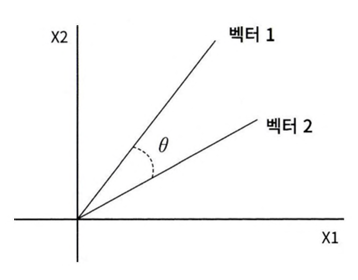

### **두 벡터 사잇각**

- 두 벡터의 사잇각에 따른 상호 관계: 유사, 관련성 없음, 반대 관계
- 두 벡터 A, B의 코사인 값 구하기
  - 두 벡터의 내적: $A*B=\lVert A\rVert\lVert B\rVert cos\theta$
  - 유사도 cosΘ: $\displaystyle similarity=cos\theta=\frac{A\cdot B}{\lVert A\rVert \lVert B\rVert}=\frac{\displaystyle\sum^n_{i=1}A_iB_i}{\sqrt{\displaystyle\sum^n_{i=1}A^2_i}\sqrt{\displaystyle\sum^n_{i=1}B^2_i}}$
- 코사인 유사도가 문서의 유사도 비교에 가장 많이 사용되는 이유
  - 피처 벡터화 변환 시 차원이 매우 많은 희소 행렬이 되기 쉬움
  - 문서와 문서 벡터 간의 크기에 기반한 유사도 지표(ex. 유클리드 거리 기반 지표)는 정확도가 떨어지기 쉬움
  - 긴 문서의 경우 단어의 빈도수도 더 많을 것이기 때문에 빈도수에만 기반해서는 공정한 비교 불가


In [5]:
# 두 개의 넘파이 배열에 대한 코사인 유사도를 구하는 함수

import numpy as np
def cos_similarity(v1, v2):
  dot_product = np.dot(v1, v2)
  l2_norm = (np.sqrt(sum(np.square(v1)))*np.sqrt(sum(np.square(v2))))
  similarity = dot_product/l2_norm
  return similarity

In [9]:
# 3개의 문서의 유사도 비교를 위해 TF-IDF로 벡터화된 행렬로 변환
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends',
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hold goes']

tfid_vect_simple = TfidfVectorizer()
feature_vect_simple = tfid_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


- 반환된 행렬은 희소 행렬 => cos_similarity()의 인자 array로 만들기 위해 밀집 행렬로 변환한 뒤 다시 각각을 배열로 변환

In [12]:
# TFidfVectorizer로 transform()한 결과는 희소 행렬이므로 밀집 행렬로 변환
feature_vect_dense = feature_vect_simple.todense()

# 1, 2번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)

# 두 문장의 코사인 유사도 추출
similarity_simple = cos_similarity(vect1, vect2)
print('문장 1, 문장 2 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도: 0.402


In [18]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect1, vect3)
print('문장 1, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

vect2 = np.array(feature_vect_dense[1]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect2, vect3)
print('문장 1, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 3 Cosine 유사도: 0.404
문장 1, 문장 3 Cosine 유사도: 0.456


- 사이킷런의 `cosine_similarity()`
  - 첫 번째 파라미터: 비교 기준이 되는 문서의 피처 행렬
  - 두 번째 파라미터: 비교되는 문서의 피처 행렬
  - 희소 행렬, 밀집 행렬 모두 가능
  - 행렬, 배열 모두 가능

In [20]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


- 1: 비교 기준인 문서 1 자신에 대한 유사도
- 0.40207758: 문장 1 - 문장 2 유사도
- 0.40425045: 문장 1 - 문장 3 유사도

In [21]:
# 비교 대상에서 자신은 제외

from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


In [22]:
# 쌍(pair)으로 코사인 유사도 값 제공
similarity_simple_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)
print('shape:', similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape: (3, 3)


- 반환값: ndarray

### **Opinion Review 데이터 세트를 이용한 문서 유사도 측정**

In [25]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

# 단어 원형 추출 함수
lemmar = WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

# 특수 문자 사전 생성: {33: None ...}
# ord(): 아스키 코드 생성
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

# 특수 문자 제거 및 단어 원형 추출
def LemNormalize(text):
    # 텍스트 소문자 변경 후 특수 문자 제거
    text_new = text.lower().translate(remove_punct_dict)

    # 단어 토큰화
    word_tokens = nltk.word_tokenize(text_new)

    # 단어 원형 추출
    return LemTokens(word_tokens)

In [54]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = r'/content/opinion data'
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_,index_col=None, header=0,encoding='latin1')
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english' , \
                             ngram_range=(1,2), min_df=0.05, max_df=0.85 )
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


- 전자제품, 호텔, 자동차를 주제로 군집화
  - 호텔을 주제로 군집화된 문서를 이용해 다른 문서와의 유사도 확인
- 피처 벡터화된 데이터를 cosine_similarity()로 상호 비교해 유사도 확인

In [55]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=2인 데이터는 호텔로 군집화된 데이터. DataFrame에서 해당 인덱스를 추출
hotel_indexes = document_df[document_df['cluster_label']==2].index
print('호텔로 클러스터링 된 문서들의 DataFrame Index:', hotel_indexes)

# 호텔로 군집화된 데이터 중 첫 번째 문서를 추출해 파일명 표시
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명', comparison_docname, '와 타 문서 유사도 #####')

similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 클러스터링 된 문서들의 DataFrame Index: Index([ 1,  2,  4,  8, 10, 13, 15, 16, 19, 21, 22, 23, 24, 25, 26, 28, 30, 31,
       40, 43, 45, 48],
      dtype='int64')
##### 비교 기준 문서명 /content/opinion data/battery-life_netbook_1005ha 와 타 문서 유사도 #####
[[1.         0.04259058 0.0174721  0.87235155 0.02117479 0.02899307
  0.00819181 0.01468175 0.01720395 0.01973879 0.01197555 0.01382194
  0.04361664 0.01279173 0.01109643 0.16753386 0.01035881 0.0828197
  0.03440586 0.37537732 0.03321949 0.0079295 ]]


- 유사도 높은 순으로 정렬하고 시각화

In [56]:
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 hotel_indexes를 추출하여 재 정렬.
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 Index와 유사도값을 이용하여 파일명과 유사도값을 Seaborn 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

가장 유사도가 큰 파일명 및 유사도:
 filename      /content/opinion data/battery-life_ipod_nano_8gb
similarity                                            0.872352
Name: 8, dtype: object


Text(0.5, 1.0, '/content/opinion data/battery-life_netbook_1005ha')

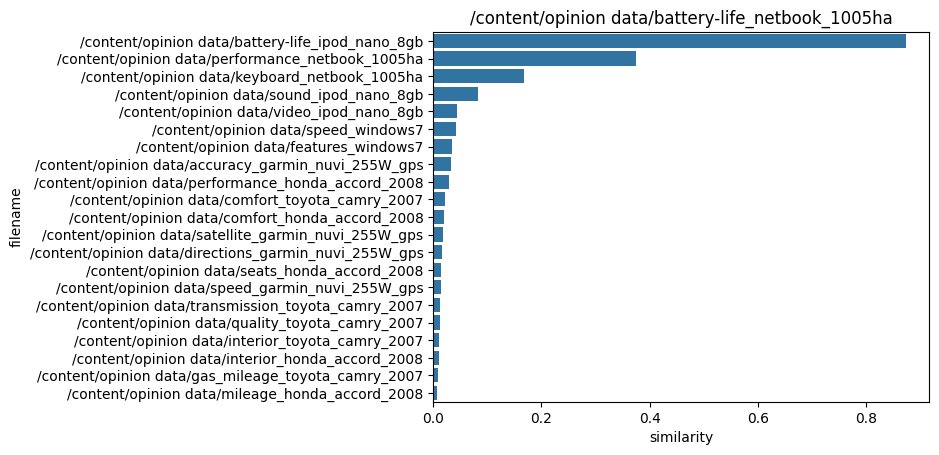

In [57]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 첫번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스 추출하되 자기 자신은 제외
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:, 1:]

hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 인덱스와 유사도 값을 이용해 파일명과 유사도값을 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value
print('가장 유사도가 큰 파일명 및 유사도:\n', hotel_1_sim_df.iloc[0,:])

sns.barplot(x='similarity', y='filename', data=hotel_1_sim_df)
plt.title(comparison_docname)

## **9. 한글 텍스트 처리 - 네이버 영화 평점 감성 분석**

### **한글 NLP 처리의 어려움**

- 한글 언어 처리는 영어 등의 라틴어 처리보다 어려움 - '띄어쓰기'와 '다양한 조사' 때문
  - 띄어쓰기: 잘못하면 의미가 왜곡되어 전달될 수 있음
  - 조사: 경우의 수가 많기 때문에 어근 추출 등의 전처리 시 제거하기 까다로움

### **KoNLPy 소개**

- `KoNLPy`: 파이썬의 대표적인 한글 형태소 패키지
  - 형태소 분석(Morphological analysis): 말뭉치를 형태소 어근 단위로 쪼개고 각 형태소에 품사 태깅(POS tagging)을 부착하는 작업

### **데이터 로딩**

In [66]:
import pandas as pd

train_df = pd.read_csv('/content/ratings_train.txt', sep='\t')
train_df.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [67]:
train_df['label'].value_counts()

,count
label,
0,75173
1,74827


- 균등한 분포
- 리뷰 텍스트를 가지는 'document'칼럼에 Null 일부 존재 => 공백으로 변환
- 문자가 아닌 숫자도 단어적인 의미로 부족하므로 파이썬 정규 표현식 모듈인 re를 이용해 공백으로 변환

In [68]:
import re

train_df = train_df.fillna(' ')
# 정규 표현식을 이용해 숫자를 공백으로 변경(정규 표현식으로 \d는 숫자를 의미)
train_df['document'] = train_df['document'].apply(lambda x: re.sub(r"\d+", " ", x))

# 테스트 데이터 세트를 로딩하고 동일하게 Null 및 숫자를 공백으로 변환
test_df = pd.read_csv('/content/ratings_test.txt', sep='\t')
test_df = test_df.fillna(' ')
test_df['document'] = test_df['document'].apply(lambda x: re.sub(r"\d+", ' ', x))

# id 칼럼 삭제 수행
train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)

- TF-IDF 방식으로 단어를 벡터화
  - 먼저, 각 문장을 한글 형태소 분석으로 형태소 단어로 토큰화
  - 한글 형태소 엔진으로 SNS 분석에 적합한 Twitter 클래스 이용
    - `morphs()` 메서드: 입력 인자로 들어온 문장을 형태소 단어 형태로 토큰화해 list 객체로 반환

In [69]:
from konlpy.tag import Twitter

twitter = Twitter()
def tw_tokenizer(text):
  # 입력 인자로 들어온 텍스트를 형태소 단어로 토큰화해 리스트 형태로 반환
  tokens_ko = twitter.morphs(text)
  return tokens_ko

/usr/local/lib/python3.10/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


- TF-IDF 피처 모델 생성
- tokenizer로 tw_tokenizer() 함수 이용

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Twitter 객체의 morphs() 객체를 이용한 tokenizer를 사용. ngram_range는 (1,2)
tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

- 로지스틱 회귀를 이용해 분류 기반의 감성 분석 수행
- 하이퍼 파라미터 C의 최적화를 위해 GridSearchCV 이용

In [73]:
# 로지스틱 회귀를 이용해 감성 분석 분류 수행
lg_clf = LogisticRegression(random_state=0, solver='liblinear')

# 파라미터 C 최적화를 위해 GridSearchCV 이용
params = {'C': [1, 3.5, 4.5, 5.5, 10]}
grid_cv = GridSearchCV(lg_clf, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv.fit(tfidf_matrix_train, train_df['label'])
print(grid_cv.best_params_, round(grid_cv.best_score_, 4))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
{'C': 3.5} 0.8593


- C가 3.5일 때 최고 정확도 0.8593

In [75]:
from sklearn.metrics import accuracy_score

# 학습 데이터를 적용한 TfidfVectorizer를 이용해 테스트 데이터를 TF-IDF 값으로 피처 변환함
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

# classifier는 GridSearchCV에서 최적 파라미터로 학습된 classifier를 그대로 이용
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도:', accuracy_score(test_df['label'], preds))

Logistic Regression 정확도: 0.86172
